In [6]:
%store -r simple_htr_master_call_sequences
%store -r tensor_kart_master_call_sequences
%store -r sudoku_robot_master_call_sequences
%store -r skyfall_master_call_sequences
%store -r vehicle_counting_master_call_sequences

import utils.utils as utils

simple_htr_master_call_sequences = simple_htr_master_call_sequences
tensor_kart_master_call_sequences = tensor_kart_master_call_sequences
sudoku_robot_master_call_sequences = sudoku_robot_master_call_sequences
skyfall_master_call_sequences = skyfall_master_call_sequences
vehicle_counting_master_call_sequences = vehicle_counting_master_call_sequences

call_sequences = sudoku_robot_master_call_sequences + simple_htr_master_call_sequences + tensor_kart_master_call_sequences + skyfall_master_call_sequences + vehicle_counting_master_call_sequences

### 3. Usage Patterns

In [7]:
method_invocations = []

#get list of all method invocations
for call_sequence in call_sequences:
    for method in call_sequence:
        if(method not in method_invocations):
            method_invocations.append(method)

#save method invocationss as defined MethodCall class into new list
method_invocations_processed = []
for method in method_invocations:
    x = ""
    try:
        x = (method.func.value.value + "." + method.func.attr.value)
    except:
        pass
    try:
        x = (method.func.value.value.value + "." + method.func.value.attr.value + "." + method.func.attr.value)
    except:
        pass
    try:
        x = (method.func.value.value.value.value + "." + method.func.value.value.attr.value + "." + method.func.value.attr.value + "." + method.func.attr.value )
    except:
        pass
    try:
        x = (method.func.value.value.value.value.value + "." + method.func.value.value.value.attr.value + "." + method.func.value.value.attr.value + "." + method.func.value.attr.value + "." + method.func.attr.value )
    except:
        pass
    method_invocations_processed.append(utils.MethodCall(x, method))

#save method in call seqeunces as defined MethodCall class into new list
call_sequences_processed = []
for call_sequence in call_sequences:
    temp_call_sequence = []
    for call in call_sequence:
        x = ""
        try:
            x = (call.func.value.value + "." + call.func.attr.value)
        except:
            pass
        try:
            x = (call.func.value.value.value + "." + call.func.value.attr.value + "." + call.func.attr.value)
        except:
            pass
        try:
            x = (call.func.value.value.value.value + "." + call.func.value.value.attr.value + "." + call.func.value.attr.value + "." + call.func.attr.value )
        except:
            pass
        try:
            x = (call.func.value.value.value.value.value + "." + call.func.value.value.value.attr.value + "." + call.func.value.value.attr.value + "." + call.func.value.attr.value + "." + call.func.attr.value )
        except:
            pass
        temp_call_sequence.append(utils.MethodCall(x, call))
    call_sequences_processed.append(temp_call_sequence) 

target_method_done = []

for target_method in method_invocations_processed:
    if(target_method.name not in target_method_done):
        print("~ " + target_method.name)
        valid_call_sequences = utils.search_call_sequence(target_method, call_sequences_processed)
        for valid_call_sequence in valid_call_sequences:
            utils.generate_usage_pattern(target_method, valid_call_sequence).print()
        target_method_done.append(target_method.name)
        print()
        print()

~ tf.placeholder
========== Usage Pattern ==========
Target Method: tf.placeholder
Pre-Set: {tf.reshape}
Post-Set: {tf.reshape, tf.argmax}
Accompany-Set: {}


~ tf.reshape
========== Usage Pattern ==========
Target Method: tf.reshape
Pre-Set: {tf.placeholder}
Post-Set: {tf.placeholder, tf.argmax}
Accompany-Set: {}
========== Usage Pattern ==========
Target Method: tf.reshape
Pre-Set: {}
Post-Set: {}
Accompany-Set: {}


~ tf.argmax
========== Usage Pattern ==========
Target Method: tf.argmax
Pre-Set: {tf.placeholder, tf.reshape}
Post-Set: {}
Accompany-Set: {}
========== Usage Pattern ==========
Target Method: tf.argmax
Pre-Set: {tf.nn.softmax}
Post-Set: {tf.reduce_mean, tf.nn.softmax_cross_entropy_with_logits, tf.train.GradientDescentOptimizer, tf.equal, tf.cast, tf.global_variables_initializer, tf.train.Saver, tf.Session}
Accompany-Set: {}


~ tf.nn.softmax
========== Usage Pattern ==========
Target Method: tf.nn.softmax
Pre-Set: {}
Post-Set: {tf.argmax, tf.reduce_mean, tf.nn.softmax_c

In [8]:
target_method_done = []
usage_pattern_dict = {}

for target_method in method_invocations_processed:
    if(target_method.name not in target_method_done):
        usage_pattern_dict[target_method.name] = []
        valid_call_sequences = utils.search_call_sequence(target_method, call_sequences_processed)
        for valid_call_sequence in valid_call_sequences:
            temp_usage_pattern = utils.generate_usage_pattern(target_method, valid_call_sequence)
            usage_pattern_dict[target_method.name].append(temp_usage_pattern)
        target_method_done.append(target_method.name)

### 4. Sequence Clusters

Method Invocation: tf.placeholder

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.reshape

Similarity Matrix: 
          0         1
0  1.000000  0.333333
1  0.333333  1.000000



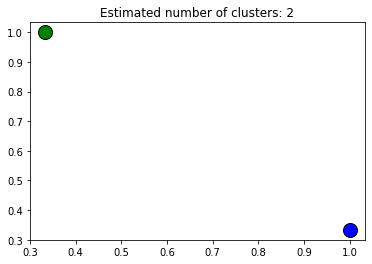

Labels:
[0 1]
Method Invocation: tf.argmax

Similarity Matrix: 
          0         1
0  1.000000  0.333333
1  0.333333  1.000000



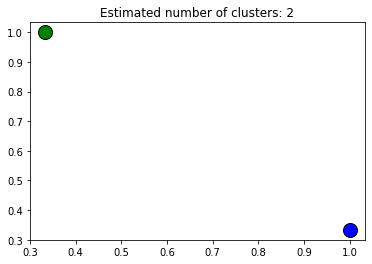

Labels:
[0 1]
Method Invocation: tf.nn.softmax

Similarity Matrix: 
          0         1
0  1.000000  0.333333
1  0.333333  1.000000



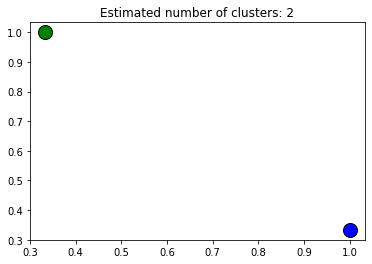

Labels:
[0 1]
Method Invocation: tf.reduce_mean

Similarity Matrix: 
          0         1
0  1.000000  0.333333
1  0.333333  1.000000



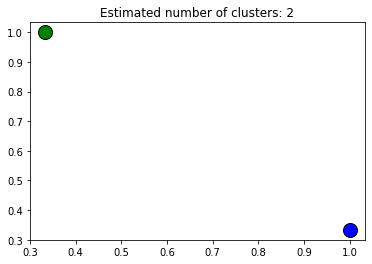

Labels:
[0 1]
Method Invocation: tf.nn.softmax_cross_entropy_with_logits

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.train.GradientDescentOptimizer

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.equal

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.cast

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.global_variables_initializer

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.train.Saver

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.Session

Similarity Matrix: 
          0         1         2
0  1.000000  0.666667  0.666667
1  0.666667  1.000000  0.666667
2  0.666667  0.666667  1.000000



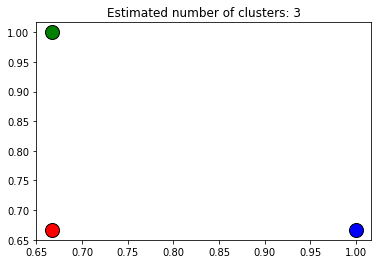

Labels:
[0 1 2]
Method Invocation: tf.Variable

Similarity Matrix: 
          0         1         2         3
0  1.000000  0.666667  0.333333  0.333333
1  0.666667  1.000000  0.333333  0.333333
2  0.333333  0.333333  1.000000  0.464286
3  0.333333  0.333333  0.464286  1.000000



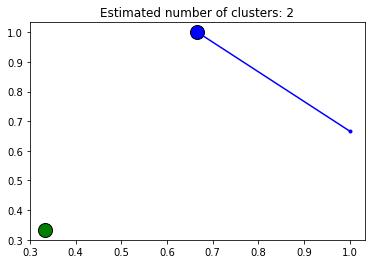

Labels:
[0 0 1 1]
Method Invocation: tf.truncated_normal

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.constant

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.nn.conv2d

Similarity Matrix: 
          0         1
0  1.000000  0.416667
1  0.416667  1.000000



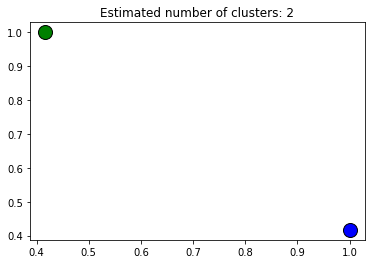

Labels:
[0 1]
Method Invocation: tf.nn.max_pool

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.nn.relu

Similarity Matrix: 
          0         1         2
0  1.000000  0.666667  0.388889
1  0.666667  1.000000  0.333333
2  0.388889  0.333333  1.000000



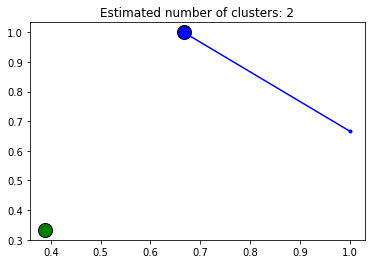

Labels:
[0 0 1]
Method Invocation: tf.matmul

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.compat.v1.disable_eager_execution

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.compat.v1.placeholder

Similarity Matrix: 
     0    1
0  1.0  0.0
1  0.0  1.0



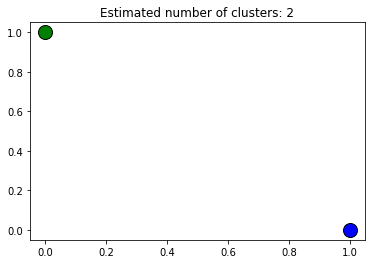

Labels:
[0 1]
Method Invocation: tf.compat.v1.get_collection

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.control_dependencies

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.compat.v1.train.AdamOptimizer

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.expand_dims

Similarity Matrix: 
          0         1
0  1.000000  0.407407
1  0.407407  1.000000



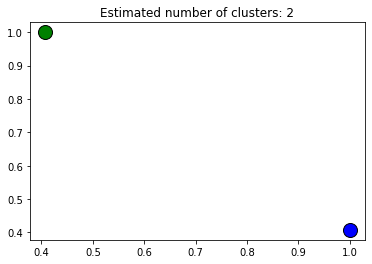

Labels:
[0 1]
Method Invocation: tf.random.truncated_normal

Similarity Matrix: 
          0         1
0  1.000000  0.466667
1  0.466667  1.000000



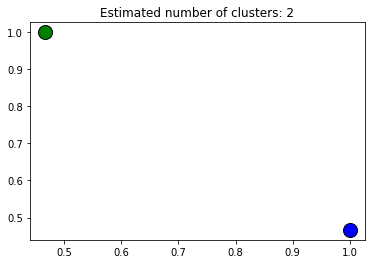

Labels:
[0 1]
Method Invocation: tf.compat.v1.layers.batch_normalization

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.nn.max_pool2d

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.squeeze

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.compat.v1.nn.bidirectional_dynamic_rnn

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.concat

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.nn.atrous_conv2d

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.transpose

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.SparseTensor

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.compat.v1.nn.ctc_lo

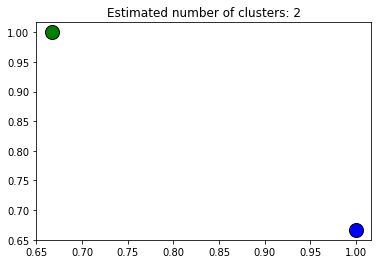

Labels:
[0 1 0]
Method Invocation: tf.GraphDef

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.gfile.GFile

Similarity Matrix: 
          0         1
0  1.000000  0.333333
1  0.333333  1.000000



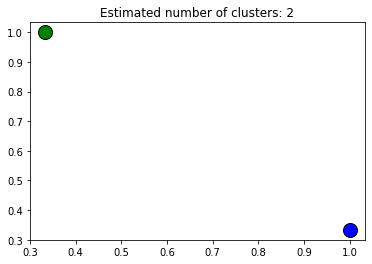

Labels:
[0 1]
Method Invocation: tf.import_graph_def

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.gfile.Open

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.py_func

Similarity Matrix: 
          0         1
0  1.000000  0.666667
1  0.666667  1.000000



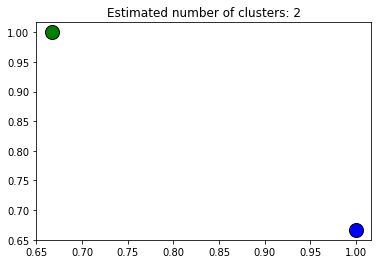

Labels:
[0 1]
Method Invocation: tf.map_fn

Method Invocation contains only 1 usage pattern.
No clusters are generated. 
Method Invocation: tf.summary.image

Method Invocation contains only 1 usage pattern.
No clusters are generated. 


In [9]:
from pandas import *
for key in usage_pattern_dict:
    print("=================================================")
    print("Method Invocation: " + key)
    print()

    target_usage_pattern_list = usage_pattern_dict[key]

    if len(target_usage_pattern_list) == 1:
        print("Method Invocation contains only 1 usage pattern.")
        print("No clusters are generated. ")
    else:
        similarity_matrix = utils.generate_similarity_matrix(target_usage_pattern_list)
        print("Similarity Matrix: ")
        print(DataFrame(similarity_matrix))
        print()
        utils.generate_clusters(similarity_matrix, True)

Method Invocation: tf.nn.relu

Similarity Matrix: 
          0         1         2
0  1.000000  0.666667  0.388889
1  0.666667  1.000000  0.333333
2  0.388889  0.333333  1.000000



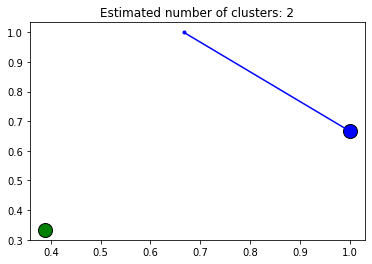

Labels:
[0 0 1]


In [10]:
from pandas import *
for key in usage_pattern_dict:
    if(key == "tf.nn.relu"):
        print("=================================================")
        print("Method Invocation: " + key)
        print()

        target_usage_pattern_list = usage_pattern_dict[key]

        if len(target_usage_pattern_list) == 1:
            print("Method Invocation contains only 1 usage pattern.")
            print("No clusters are generated. ")
        else:
            similarity_matrix = utils.generate_similarity_matrix(target_usage_pattern_list)
            print("Similarity Matrix: ")
            print(DataFrame(similarity_matrix))
            print()
            utils.generate_clusters(similarity_matrix, True)